# Animal Attribute-Based Cluster Comparison

This repo relies on data from the "Animals with Attributes" dataset found [here](https://cvml.ist.ac.at/AwA/). Only the base package is utilized, meaning all clustering is text / attribute based. Two methods of clustering are explored, K-Means and hierarchical/agglomerative.


## Environment Setup

A setup section similar to my other DS repos, downloads and manipulates the necessary files and then cleans up a bit afterwards.

In [1]:
# grab files, unzip
import requests, tarfile

!rm -rf w10q02

file_url = 'https://cvml.ist.ac.at/AwA/AwA-base.tar.bz2'
fname = file_url[file_url.find('/AwA/')+5:]

r = requests.get(file_url)
open(fname, 'wb').write(r.content)

!mkdir w10q02

tar = tarfile.open(fname, 'r:bz2')
tar.extractall()
tar.close()

!mv ./Animals_with_Attributes/* ./w10q02/
!rm -r Animals_with_Attributes AwA-base.tar.bz2

## Cluster Method #1: K-Means

In [2]:
# import data and build kmeans model
import numpy as np
from sklearn.cluster import KMeans

pred_matrix = np.loadtxt('./w10q02/predicate-matrix-continuous.txt')
animals = np.loadtxt('./w10q02/classes.txt', dtype = 'str')[:, 1]
k = KMeans(n_clusters = 10)
k.fit(pred_matrix)
clusters = k.labels_
for i in range(10):
    mask = [a for a in range(len(clusters)) if clusters[a] == i]
    print(f'Cluster {i}: {", ".join(animals[mask])}')

Cluster 0: killer+whale, blue+whale, humpback+whale, seal, otter, walrus, dolphin
Cluster 1: beaver, skunk, mole, hamster, squirrel, rabbit, rat, mouse, raccoon
Cluster 2: spider+monkey, gorilla, chimpanzee, giant+panda
Cluster 3: hippopotamus, moose, elephant, ox, sheep, rhinoceros, buffalo, pig, cow
Cluster 4: tiger, leopard, lion
Cluster 5: dalmatian, persian+cat, german+shepherd, siamese+cat, chihuahua, collie
Cluster 6: antelope, horse, giraffe, zebra, deer
Cluster 7: bat
Cluster 8: fox, wolf, weasel, bobcat
Cluster 9: grizzly+bear, polar+bear


In [3]:
# re-running this a k = 3, for later comparison
k = KMeans(n_clusters = 3)
k.fit(pred_matrix)
clusters = k.labels_
for i in range(3):
    mask = [a for a in range(len(clusters)) if clusters[a] == i]
    print(f'Cluster {i}: {", ".join(animals[mask])}')

Cluster 0: antelope, horse, hippopotamus, moose, elephant, ox, sheep, rhinoceros, giraffe, buffalo, zebra, giant+panda, deer, pig, cow
Cluster 1: grizzly+bear, beaver, dalmatian, persian+cat, german+shepherd, siamese+cat, skunk, mole, tiger, leopard, spider+monkey, gorilla, fox, chimpanzee, hamster, squirrel, rabbit, bat, wolf, chihuahua, rat, weasel, bobcat, lion, mouse, polar+bear, collie, raccoon
Cluster 2: killer+whale, blue+whale, humpback+whale, seal, otter, walrus, dolphin


k = 10 clusters
>Cluster 0: dalmatian, persian+cat, german+shepherd, siamese+cat, chihuahua, collie
>
>Cluster 1: antelope, horse, giraffe, zebra, deer
>
>Cluster 2: killer+whale, blue+whale, humpback+whale, seal, otter, walrus, dolphin
>
>Cluster 3: moose, ox, sheep, buffalo, giant+panda, pig, cow
>
>Cluster 4: beaver, mole, fox, bat, rat, weasel
>
>Cluster 5: grizzly+bear, polar+bear
>
>Cluster 6: spider+monkey, gorilla, chimpanzee
>
>Cluster 7: hippopotamus, elephant, rhinoceros
>
>Cluster 8: tiger, leopard, wolf, bobcat, lion
>
>Cluster 9: skunk, hamster, squirrel, rabbit, mouse, raccoon

Since the clusters change with each run of the above cell, I copied the output above for permanence. Each of the clusters appear to have a general theme, like how cluster 2 is strictly oceanic mammals or how cluster 6 is primates. Of the ten classes above, only two have animals included that are decidedly different than their group: cluster 3 with a 'giant+panda' (in a group of ungulates) and cluster 4 with a 'bat' (in a group of smaller oblong mammals). On the whole, the clusters look to be reasonably accurate, more so than originally expected.

k = 3 clusters
> Cluster 0: antelope, horse, hippopotamus, moose, elephant, ox, sheep, rhinoceros, giraffe, buffalo, zebra, deer, pig, cow
>
>Cluster 1: grizzly+bear, beaver, dalmatian, persian+cat, german+shepherd, siamese+cat, skunk, mole, tiger, leopard, spider+monkey, gorilla, fox, chimpanzee, hamster, squirrel, rabbit, bat, wolf, chihuahua, rat, weasel, giant+panda, bobcat, lion, mouse, polar+bear, collie, raccoon
>
>Cluster 2: killer+whale, blue+whale, humpback+whale, seal, otter, walrus, dolphin

Later when the hierarchical method is run, it returns 3 main clusters. In order to more easily compare the two classifiers, this K-Means classifier was also run with a k = 3.

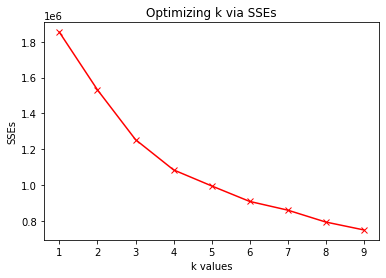

In [4]:
# optimizing the number of clusters
import matplotlib.pyplot as plt

sses = []
ks = range(1, 10)
for k in ks:
    kmodel = KMeans(n_clusters = k)
    kmodel.fit(pred_matrix)
    sses.append(kmodel.inertia_)

fig, ax = plt.subplots()
ax.plot(ks, sses, 'rx-')
ax.set_xlabel('k values')
ax.set_ylabel('SSEs')
ax.set_title('Optimizing k via SSEs')
plt.show()


The optimal k value looks to be right at 4. I will run through the clusters once more just to see what the final cluster created looks like.

In [5]:
# cluster at k = 4
k = KMeans(n_clusters = 4)
k.fit(pred_matrix)
clusters = k.labels_
for i in range(4):
    mask = [a for a in range(len(clusters)) if clusters[a] == i]
    print(f'Cluster {i}: {", ".join(animals[mask])}')

Cluster 0: antelope, horse, hippopotamus, moose, elephant, ox, sheep, rhinoceros, giraffe, buffalo, zebra, deer, pig, cow
Cluster 1: beaver, dalmatian, persian+cat, siamese+cat, skunk, mole, spider+monkey, chimpanzee, hamster, squirrel, rabbit, bat, chihuahua, rat, weasel, giant+panda, mouse, collie, raccoon
Cluster 2: killer+whale, blue+whale, humpback+whale, seal, otter, walrus, dolphin
Cluster 3: grizzly+bear, german+shepherd, tiger, leopard, gorilla, fox, wolf, bobcat, lion, polar+bear


k = 4 clusters
>Cluster 0: beaver, dalmatian, persian+cat, siamese+cat, skunk, mole, spider+monkey, chimpanzee, hamster, squirrel, rabbit, bat, chihuahua, rat, weasel, mouse, collie, raccoon
>
>Cluster 1: antelope, horse, hippopotamus, moose, elephant, gorilla, ox, sheep, rhinoceros, giraffe, buffalo, zebra, giant+panda, deer, pig, cow
>
>Cluster 2: grizzly+bear, german+shepherd, tiger, leopard, fox, wolf, bobcat, lion, polar+bear
>
>Cluster 3: killer+whale, blue+whale, humpback+whale, seal, otter, walrus, dolphin

Cluster copied into a markdown cell to freeze output. The final cluster looks to differentiate the larger k = 3 cluster 1 into smaller and larger mammals.

## Cluster Method #2: Hierarchical/Agglomerative Linkages

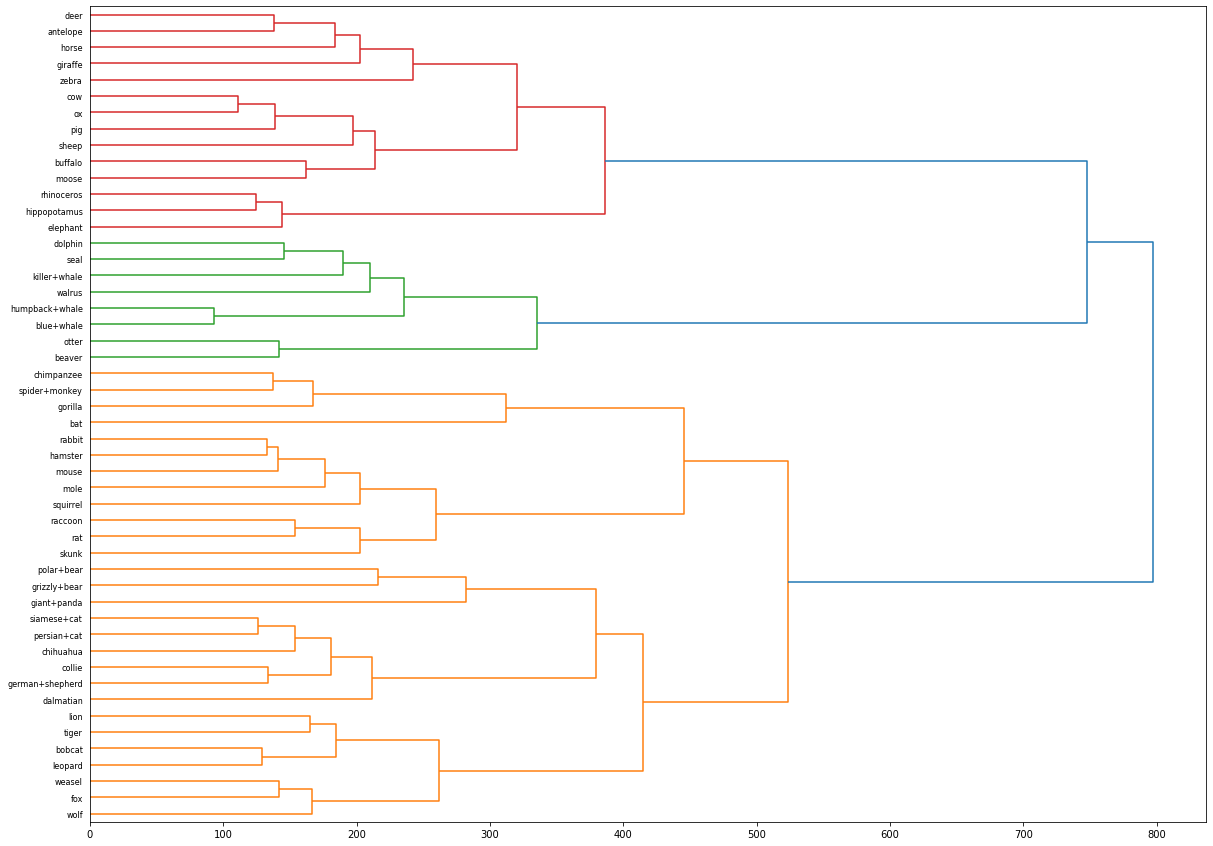

In [6]:
# build hierarchical cluster
from scipy.cluster.hierarchy import linkage, dendrogram
from pylab import rcParams
import matplotlib.pyplot as plt

l = linkage(pred_matrix, 'ward')
rcParams['figure.figsize'] = (20, 15)
d = dendrogram(l, orientation = 'right', labels = animals)

The hierarchical clustering does look to follow logically, in that in addition to clustering animals according to shared attributes it also highlights how closely related clusters are with one another. In particular, it highlights which animals of a cluster are most similar (by attribute) to animal(s) of another cluster. The dendogram visualization provides a bit more insight into how the method clustered animal groups together, something not as transparently displayed via just the group names and participants K-Means cluster output. The dendrogram shows three major clusters: "ungulates", "aquatic", and "all other" animals.

In comparing just the k = 3 clusters, they are close though not exactly the same. The hierarchical cluster method moved "beavers" in the "aquatic animals" cluster (green), while K-Means placed it with the "all other" land-based mammals.